# Arbre de décision et Forêts aléatoires

Nous allons ici nous intéresser à deux méthodes d'**apprentissage supervisé** pour résoudre des problèmes de **classification**: les arbres de décision (**Decision Tree**) et les forêts aléatoires (**Random Forests**) 

Les Random Forests est une méthode ensembliste qui repose sur l'aggrégation (**Bagging**) de plusieurs arbres de type **CART** (**C**lassification **A**nd **R**egression **T**rees). Il existe d'autres types d'arbres (ex: CHAID, C4.5,etc) mais ceux-ci ne seront pas traités ici. 

Le principe général de **CART** est de partitionner récursivement l’espace des données de façon **binaire**, en sous-groupes **homogènes*** en termes de classe (**label**). 

<div>
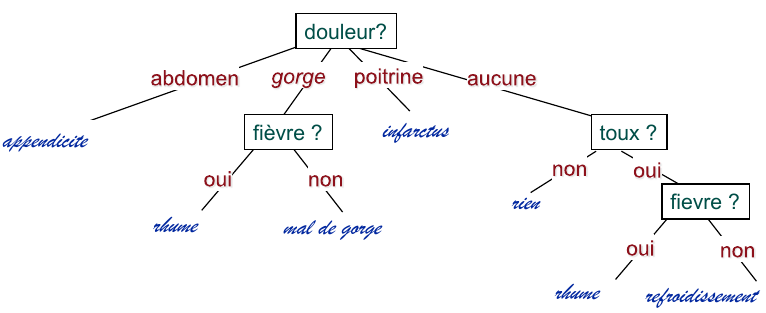
</div>

#### **Arbre de décision du jeu de données TITANIC**

<div>
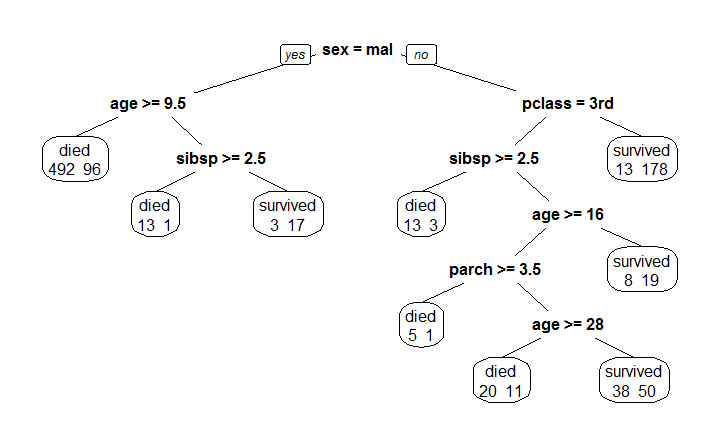
</div>

#### **Algorithme de l'arbre CART**

<div>
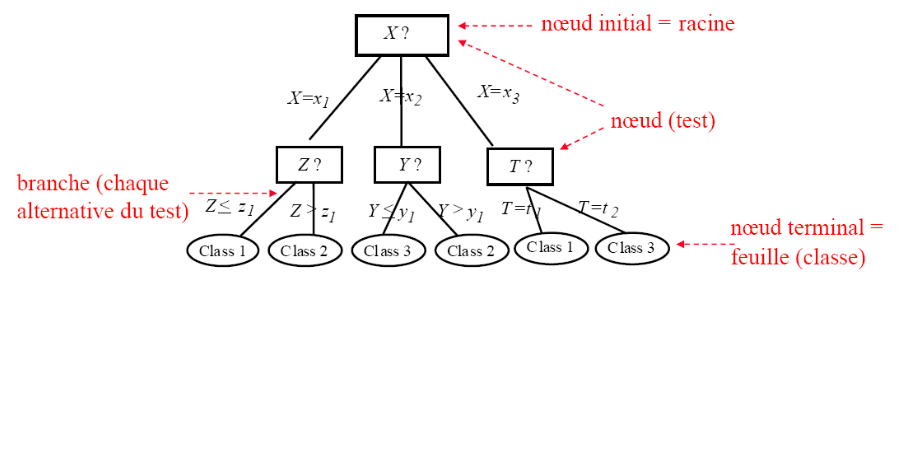
</div>

L'arbre CART est construit de manière **récursive**. Partant de la racine (regroupement des observations de la base de **Training**)de l'arbre, on effectue une suite de tests pour définir les noeuds de l'arbre puis les feuilles (noeuds terminaux). 
- A chaque noeud, l'idée est de séparer au mieux (au sens de la Target 0 vs 1) les individus de la base X en choisissant le meilleur couple (variable, seuil de découpage). 
- On split (découpe) alors $X$ en deux parties : $X_G$ (individus à gauche) et $X_D$ (individus à droite). On construit alors les sous-arbres partant de $X_G$ et de $X_D$. 
L'idée est d'avoir des noeuds les **plus purs** possible. Pour les arbres CART, le critère utilisé à chaque étape est le **critère d'impureté du Gini**. On construit alors les sous-arbres en cherchant à **maximiser le décroissance du critère d'impureté** (les noeuds seront ainsi de plus en plus purs - tels que le maximum d'individus qui les composent appartiennent à la même classe).

La classe prédite pour une feuille (noeud terminal) est obtenue en effectuant un **vote majoritaire** parmi les exemples de la base Training appartenant à cette feuille.

Afin d'éviter le sur-apprentissage (**over-fitting**), on effectue généralement un **élagage** de l'arbre construit (suppression des branches peu représentatives et nuisant à la généralisation). Les arbres retenus peuvent varier selon la stratégie d'élagage adopté (profondeur de l'arbre, nombre d'observations minimal par feuille,etc...).


#### **Random Forests**

Une Random Forest est un ensemble d'arbres CART. Elle repose sur le principe que *l'union fait la force*. L'idée est de générer **un grand nombre d'arbres CART simples sans élagage** puis de les aggréger. Un vote majoritaire sur l'ensemble des arbres est ensuite effectué pour prédire la classe d'appartenance de chaque individu. 

On souhaite avoir des arbres très différents les uns les autres (très décorrélés). Pour ce faire, on va construire chaque arbre sur un échantillon d'individus différent(obtenu par Bootstrap - tirage avec remise dans la base de Training). Pour chaque noeud de l'arbre choisi,on choisit le "split" (variable, seuil de découpage) optimal parmi k variables tirées aléatoirement dans les p variables du dataset (k<<p). 

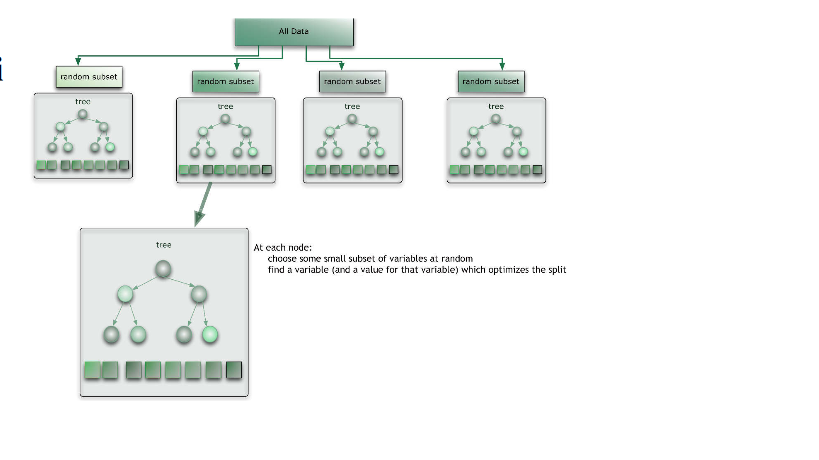

Dans ce notebook, nous allons appliquer les modèles CART et RANDOM FORESTS au jeu de données **PIMA INDIAN DIABETES**. 
On cherche à prédire si un patient est diabétique ou non.

Les données disponibles sont les suivantes :

Pregnancies = Number of times pregnant

Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure  = Diastolic blood pressure (mm Hg)

SkinThickness = Triceps skin fold thickness (mm)

Insulin = 2-Hour serum insulin (mu U/ml)

BMI = Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction = Diabetes pedigree function

Age  = Age (years)

Outcome = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)




### 1. Import des libraries utiles

In [1]:
#Analyse exploratoire des données et Preprocessing
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 

import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

### 2. Description du dataset
1. Charger le dataset et afficher sa dimension

2. Afficher les 10 premières lignes de la table

3. Afficher la liste des variables et leurs types


 ### 3. Analyse des valeurs manquantes
1. Afficher le nombre ainsi que le pourcentage de valeurs manquantes par variable


 ### 4. Analyse exploratoire 
 
 1. Afficher le `distplot`de la variable `Glucose`. Commenter
 2. Afficher le `distplot` de la variable `DiabetesPedigreeFunction`. Commenter
 3. Afficher le `Boxplot`de la variable `Insulin`en fonction de la variable cible `Outcome`
 4. Afficher les `Boxplot` des variables `BMI` et `Age` en fonction de la variable cible `Outcome`
 5. Afficher le `pairplot`de l'ensemble des variables `BloodPressure`et `BMI`en fonction de la variable `Outcome`.Commenter
 6. Afficher la HeatMap des corrélations de l'ensemble des variables (hors variable cible). Commenter
 
 **Bonus:** Afficher le `kdeplot`de l'ensemble des variables en fonction de la variable cible. Commenter
 
 

 ### 5. Data splitting
 
 1. Créer un DataFrame `X` contenant les features et `y` la Target
 2. Générer les échantillons d'apprentissage (training) et de test à l'aide de `sklearn.model_selection.train_test_split` en fixant le test_size à 0.33 et random_state à 42 et stratify = y 

3. Àfficher le tableau de fréquence de la variable `y` (en nombre et pourcentage) pour les 2 échantillons générés. Commenter 

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
help(sklearn.tree.DecisionTreeClassifier)

NameError: name 'sklearn' is not defined

 ### 7. TREE - Modélisation et Performances

Nous allons à cette stade entraîner un **modèle TREE** en utilisant la fonction `sklearn.tree.DecisionTreeClassifier`

1. Afficher la DocString de cette fonction
2. On choisit max_depth = 3 ou min_samples_leaf = 10. Quelle est leur signification?
3. Instancier un `DecisionTreeClassifier(max_depth=3)` et appliquer le (fonction `.fit()`) sur votre échantillon d'apprentissage

4. Faire une prédiction (fonction `.predict()`) de la variable Y sur l'échantillon de test. 

5. Définir une matrice de confusion
   Afficher la `heatmap` de la matrice de confusion (fonction `sklearn.metrics.confusion_matrix`). Commenter

6. Afficher l'AUC
   
7. Définir la courbe ROC
   Afficher la courbe ROC. Interpréter
   
8. Visualiser l'arbre construit à l'aide de `sklearn.tree.plot_tree`. Commenter les résultats. 
 
 **Bonus** : Visualiser l'arbre à l'aide de `sklearn.tree.export_graphviz` (pip install graphviz)


 ### 7. Random Forest - Modélisation et Performances

Nous allons à cette stade entraîner un **modèle RANDOM FOREST ** en utilisant la fonction `sklearn.ensemble.RandomForestClassifier`

1. Afficher la DocString de cette fonction
2. On choisit n_estimators=1000. Quelle est sa signification?
3. Instancier un `RandomForestClassifier(n_estimators=1000)` et appliquer le (fonction `.fit()`) sur votre échantillon d'apprentissage

4. Faire une prédiction (fonction `.predict()`) de la variable Y sur l'échantillon de test. 

5. Afficher l'AUC

6. Afficher l'importance de chaque variable dans le RF avec `rf.feature_importances_`. Associer à chaque niveau le nom de la variable associée (dans l'ordre des variables disponibles dans le dataset).
   Afficher le `barplot` de l'importance par variable. Commenter
   
**Bonus** : Exclure les 2 variables les moins importantes (`SkinThickness`et `Insulin`) et relancer le modèle. Comparer l'AUC à celui du modèle incluant l'ensemble des variables
**Bonus**: Rechercher les hyperparamètres optimaux de la RF par GridSearch puis relancer le modèle RF et calculer l'AUC. Commenter les résultats par comparaison avec les précédents modèles

```
param_grid = { 
    'n_estimators': [100, 500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
```